###O que é um campo escalar?

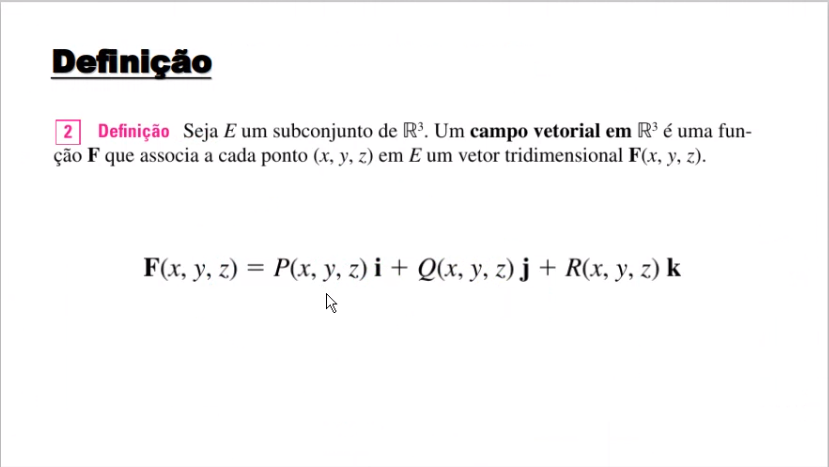



In [34]:
!pip install sympy==1.6.2
!pip install plotly==4.9

In [35]:
import numpy as np
import sympy as sp
import av_utils as av
import sympy.vector as sv
import plotly.graph_objects as go

In [36]:
sp.init_printing()
x,y,z,t,s,u,v,phi,theta = sp.symbols('x y z t s u v phi theta', real = True)
R = sv.CoordSys3D('R')

$f(x,y) = \frac{1}{\sin(x)\sin(y) + 2}$

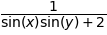

In [ ]:
def field(x,y):
  return 1/(sp.sin(x)*sp.sin(y) + 2)
field(x,y)  

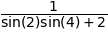

In [ ]:
field(2,4)

In [ ]:
sp.N(field(2,4))

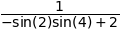

In [ ]:
field(-2,4)

In [ ]:
sp.N(_) #valor numérico calculado anteriormente

In [ ]:
sp.N(field(-2,4))

In [ ]:
field_np = sp.lambdify([x,y],field(x,y), 'numpy')
field_np(2,4)

In [ ]:
field_np(-2,4)

$z = f(x,y)$

In [ ]:
xx, yy = np.mgrid[-3:3:15j, -3:3:15j]

In [ ]:
zz = field_np(xx,yy)

In [ ]:
fig = go.Figure()
fig.add_surface(x = xx, y = yy, z = zz)

In [ ]:
#Agr com mais pontos
xx1, yy1 = np.mgrid[-30:30:15j, -30:30:15j]
zz1 = field_np(xx1,yy1)
fig1 = go.Figure()
fig1.add_surface(x = xx1, y = yy1, z = zz1)

In [ ]:
#Adicionando linhas de contorno
xx2, yy2 = np.mgrid[-30:30:15j, -30:30:15j]
zz2 = field_np(xx2,yy2)
fig2 = go.Figure()
fig2.add_surface(x = xx2, y = yy2, z = zz2)
fig2.update_traces(contours_z=dict(show=True, usecolormap=True,
                                  highlightcolor="limegreen", project_z=True))

###Heatmap
Mapa de temperatura

In [ ]:
#Heatmap não aceita x e y como malha(matriz), como nas funções acima.
fig3 = go.Figure()
fig3.add_heatmap(x = xx2.flatten(), y = yy2.flatten(), z = zz2.flatten())

In [ ]:
#Melhorando o heatmap
fig4 = go.Figure()
fig4.add_heatmap(x = xx2.flatten(), y = yy2.flatten(), z = zz2.flatten(), zsmooth='best', connectgaps=True)

In [ ]:
def temp(x,y):
  return 25-(x**2 + y**2)

In [ ]:
temp_np = sp.lambdify([x,y],temp(x,y), 'numpy')
xxt, yyt = np.mgrid[-10:10:15j, -10:10:15j]
zzt = temp_np(xxt,yyt)
figt = go.Figure()
figt.add_heatmap(x = xxt.flatten(), y = yyt.flatten(), z = zzt.flatten(), zsmooth='best', connectgaps=True)

In [ ]:
av.plot_density_function(temp(x,y),(x,-10,10),(y,-10,10))

In [ ]:
def temp3d(x,y,z):
  return 25-(x**2 + y**2 + z**2)

In [ ]:
av.plot3d_density_function(temp3d(x,y,z),(x,-10,10),(y,-10,10),(z,10))